# Monte Carlo 

## Predicting Firm's future Gross Profits
- Gross Profit = Revenue - Cogs(Cost of Good Sold)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# All values in Millions
rev_mean = 170
rev_stdev = 20
iterations = 1000

In [4]:
rev = np.random.normal(rev_mean, rev_stdev, iterations)
rev

array([155.95567338, 166.7730634 , 162.42093015, 193.57905436,
       193.45888773, 141.31961772, 138.78339452, 152.63943445,
       161.19359534, 164.39334568, 180.02869225, 183.54092911,
       175.53060367, 178.88045305, 184.69592175, 172.12559737,
       147.43102932, 188.71674872, 173.24211812, 160.97597864,
       185.92141844, 135.65066124, 152.02399311, 179.97706638,
       167.99650866, 177.33833085, 169.51501412, 180.64224658,
       164.53510761, 170.77546293, 177.55430535, 169.92900666,
       178.20921792, 220.85260722, 184.43680168, 192.33669602,
       185.09245485, 187.05869604, 171.36354073, 126.36963015,
       173.02126367, 192.81793111, 171.12022134, 161.43862804,
       200.14140061, 166.031092  , 181.10873685, 163.55743945,
       163.78274876, 156.9712194 , 178.10620851, 179.01733516,
       161.98869338, 217.75064588, 171.26028508, 168.18456716,
       164.06074653, 176.86931748, 189.57928531, 178.86369734,
       185.67633517, 152.4848727 , 204.90706483, 148.75

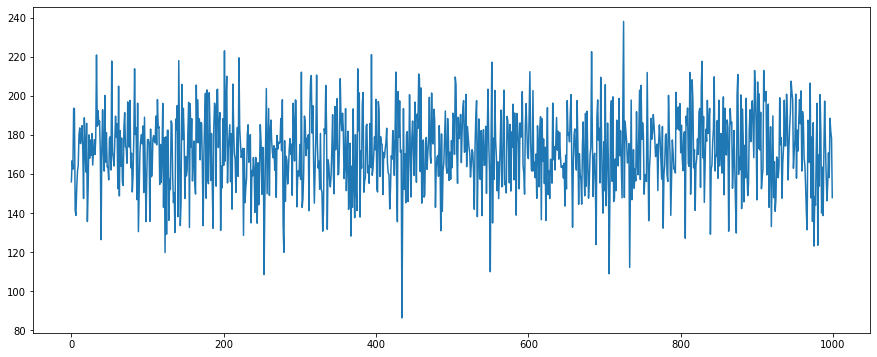

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

[]

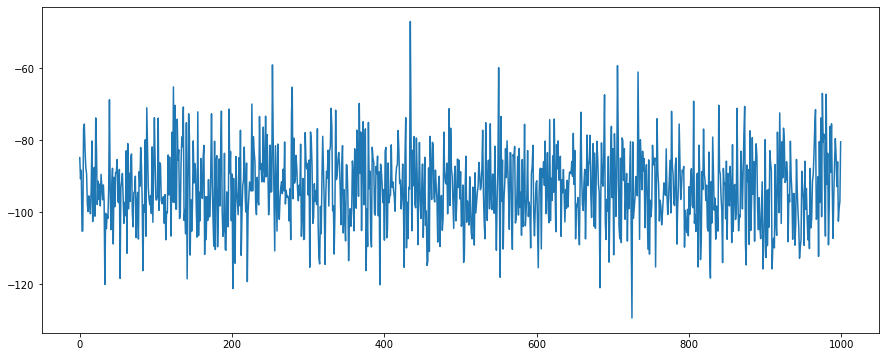

In [6]:
COGS = -(rev * np.random.normal(0.6, 0.1))
    
plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.plot()

In [7]:
COGS.mean()

-93.38123157662017

In [8]:
COGS.std()

10.736235719036745

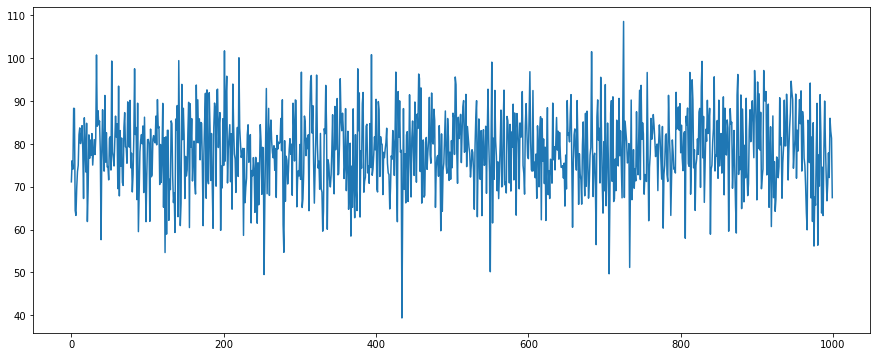

In [9]:
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [10]:
max(Gross_Profit)

108.58594102309937

In [11]:
min(Gross_Profit)

39.38258238819256

In [12]:
Gross_Profit.mean()

78.35558462695059

In [13]:
Gross_Profit.std()

9.008705628042877

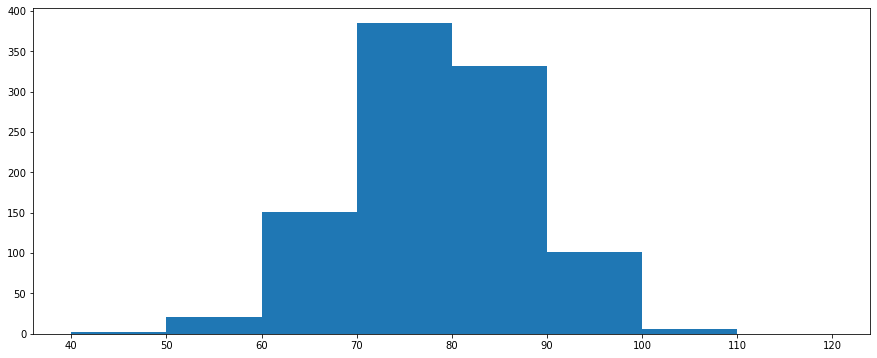

In [14]:
plt.figure(figsize=(15, 6))
plt.hist(Gross_Profit, bins=[40, 50, 60, 70, 80, 90, 100, 110, 120])
plt.show()

or

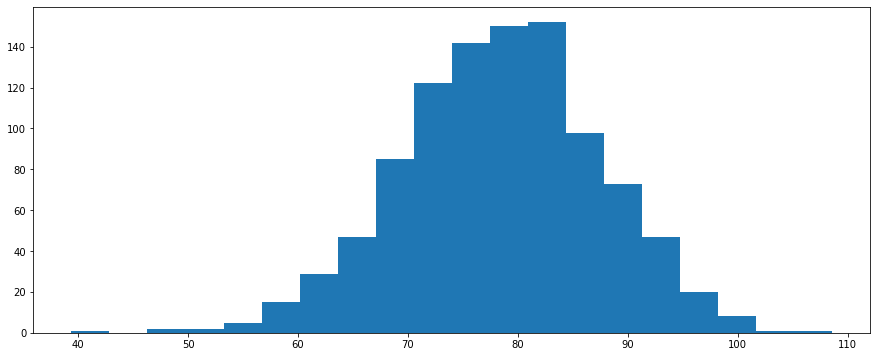

In [15]:
plt.figure(figsize=(15, 6))
plt.hist(Gross_Profit, bins=20)
plt.show()